In [31]:
'''
Test to upload Files from a local directory to nextcloud share with "password",
download via different readonly share, delete from share.
All done by using the pypi REQUESTS module
and the python modules zipfile and os
'''

import requests
import zipfile
import os


url = 'https://cloud.uni-graz.at/'  #tested on uni-graz nextcloud by Roland Maderbacher
transfer_dir = 'TRANSFER'           #local directory, has to exist with files inside
handle_token = 'example7iyBLQ5BmcsQyc2'    #read/write share on cloud
secure_token = 'exampleHYQBATPmsN2022'     #password for read/write share on cloud
download_token = 'example8AAWaYAWZCBKwTR'  #share to same path on cloud but readonly


def delete_on_cloud(filename,handle_token,secure_token):
    full_url = url + 'public.php/webdav/' + filename
    result = requests.delete(full_url, auth = (handle_token, secure_token))
    print('delete result:', result) #Response of webserver while testing


def upload_to_cloud(filename,handle_token,secure_token):
    full_url = url + 'public.php/webdav/' + filename
    result = requests.put(full_url, auth = (handle_token, secure_token), data = filename)
    print('upload result:', result) #Response of webserver while testing


def download_from_cloud(download_token):
    local_file_name = 'local-copy.zip'
    local_file = zipfile.ZipFile(local_file_name, 'w')
    local_file.close()
    full_url = url + 's/' + download_token + '/download'
    data = requests.get(full_url)

    with zipfile.ZipFile(local_file_name, 'a') as file:
        file.write(data.content)

    with zipfile.ZipFile(local_file_name, 'r') as zip_ref:
        zip_ref.extractall()

In [32]:

#Testcase: upload - download(and extract) - delete
filenamen = ["../test1.txt", "../test2.txt", "../test3.txt"]

for i in filenamen:
    print(i)
    upload_to_cloud(i,handle_token,secure_token)

   
download_from_cloud(download_token)

../test1.txt
upload result: <Response [404]>
../test2.txt
upload result: <Response [404]>
../test3.txt
upload result: <Response [404]>
<Response [404]>


OSError: [Errno 36] File name too long: b'<!DOCTYPE html>\n<html class="ng-csp" data-placeholder-focus="false" lang="de-DE" data-locale="de_AT" >\n\t<head\n data-requesttoken="YhD7DtnGnjfxnNPWIJuJX82FhxKaO3GhKpFm7yNadCo=:KSOSZp+g3AK+/bifTtzsNYjJ0SuufB6VW/9TomJoEWs=">\n\t\t<meta charset="utf-8">\n\t\t<title>\n\t\tuniCLOUD\t\t</title>\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0">\n\t\t\t\t<meta name="apple-itunes-app" content="app-id=1125420102">\n\t\t\t\t<meta name="theme-color" content="#FFFFFF">\n\t\t<link rel="icon" href="/apps/theming/favicon?v=76">\n\t\t<link rel="apple-touch-icon" href="/apps/theming/icon?v=76">\n\t\t<link rel="mask-icon" sizes="any" href="/core/img/favicon-mask.svg" color="#FFFFFF">\n\t\t<link rel="manifest" href="/apps/theming/manifest?v=76">\n\t\t<link rel="stylesheet" href="/css/core/bae4-55d5-server.css?v=fb48f31ff2ad82f1a1dfe6ee298aeb8f-8fea2f06-76">\n<link rel="stylesheet" href="/css/core/bae4-55d5-css-variables.css?v=fb48f31ff2ad82f1a1dfe6ee298aeb8f-8fea2f06-76">\n<link rel="stylesheet" href="/apps/files_rightclick/css/app.css?v=198068b3-76">\n<link rel="stylesheet" href="/core/css/guest.css?v=8fea2f06-76">\n\t\t<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/core/js/oc.js?v=8fea2f06"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/dist/core-common.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/dist/core-main.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/core/l10n/de_DE.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/dist/core-files_fileinfo.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/dist/core-files_client.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/js/core/merged-template-prepend.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/apps/files_sharing/l10n/de_DE.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/dist/files_sharing-main.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/apps/accessibility/l10n/de_DE.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/dist/accessibility-accessibilityoca.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/apps/files_rightclick/l10n/de_DE.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/apps/files_rightclick/js/script.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/apps/files_rightclick/js/files.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/apps/theming/l10n/de_DE.js?v=8fea2f06-76"></script>\n<script nonce="WWhEN0R0bkduamZ4bk5QV0lKdUpYODJGaHhLYU8zR2hLcEZtN3lOYWRDbz06S1NPU1pwK2czQUsrL2JpZlR0enNOWWpKMFN1dWZCNlZXLzlUb21Kb0VXcz0=" defer src="/apps/theming/js/theming.js?v=8fea2f06-76"></script>\n\t\t<link rel="stylesheet" href="/css/icons/icons-vars.css?v=1664198168"/><link rel="stylesheet" media="(prefers-color-scheme: dark)" href="/apps/accessibility/css/user-a82fd95db10ff25dfad39f07372ebe37"/><link rel="stylesheet" href="/apps/theming/styles?v=76"/><link rel="stylesheet" href="/apps/theming_customcss/styles?v=1660836411018"/><meta name="robots" content="noindex, nofollow"/>\t</head>\n\t<body id="body-login">\n\t\t<noscript>\n\t<div id="nojavascript">\n\t\t<div>\n\t\t\tDiese Anwendung ben\xc3\xb6tigt JavaScript zum ordnungsgem\xc3\xa4\xc3\x9fen Betrieb. Bitte <a href="https://www.enable-javascript.com/" target="_blank" rel="noreferrer noopener">aktivieren Sie JavaScript</a> und laden Sie die Seite neu.\t\t</div>\n\t</div>\n</noscript>\n\t\t\t\t\t<input type="hidden" id="initial-state-core-config" value="eyJzZXNzaW9uX2xpZmV0aW1lIjoxNDQwLCJzZXNzaW9uX2tlZXBhbGl2ZSI6dHJ1ZSwiYXV0b19sb2dvdXQiOmZhbHNlLCJ2ZXJzaW9uIjoiMjQuMC40LjIiLCJ2ZXJzaW9uc3RyaW5nIjoiMjQuMC40IEVudGVycHJpc2UiLCJlbmFibGVfYXZhdGFycyI6dHJ1ZSwibG9zdF9wYXNzd29yZF9saW5rIjpudWxsLCJtb2RSZXdyaXRlV29ya2luZyI6dHJ1ZSwic2hhcmluZy5tYXhBdXRvY29tcGxldGVSZXN1bHRzIjoyNSwic2hhcmluZy5taW5TZWFyY2hTdHJpbmdMZW5ndGgiOjAsImJsYWNrbGlzdF9maWxlc19yZWdleCI6IlxcLihwYXJ0fGZpbGVwYXJ0KSQifQ==">\n\t\t\t\t\t<input type="hidden" id="initial-state-core-capabilities" value="eyJjb3JlIjp7InBvbGxpbnRlcnZhbCI6NjAsIndlYmRhdi1yb290IjoicmVtb3RlLnBocFwvd2ViZGF2In0sIm1ldGFkYXRhQXZhaWxhYmxlIjp7InNpemUiOlsiXC9pbWFnZVxcXC8uKlwvIl19LCJmaWxlcyI6eyJiaWdmaWxlY2h1bmtpbmciOnRydWUsImJsYWNrbGlzdGVkX2ZpbGVzIjpbIi5odGFjY2VzcyJdLCJkaXJlY3RFZGl0aW5nIjp7InVybCI6Imh0dHBzOlwvXC9jbG91ZC51bmktZ3Jhei5hdFwvb2NzXC92Mi5waHBcL2FwcHNcL2ZpbGVzXC9hcGlcL3YxXC9kaXJlY3RFZGl0aW5nIiwiZXRhZyI6ImYwNDAzMGZjMDVjZWJiYjJhYjhiOThmMTk1YTM3MGI5In0sImNvbW1lbnRzIjp0cnVlLCJ1bmRlbGV0ZSI6dHJ1ZSwidmVyc2lvbmluZyI6dHJ1ZX0sImFjdGl2aXR5Ijp7ImFwaXYyIjpbImZpbHRlcnMiLCJmaWx0ZXJzLWFwaSIsInByZXZpZXdzIiwicmljaC1zdHJpbmdzIl19LCJvY20iOnsiZW5hYmxlZCI6dHJ1ZSwiYXBpVmVyc2lvbiI6IjEuMC1wcm9wb3NhbDEiLCJlbmRQb2ludCI6Imh0dHBzOlwvXC9jbG91ZC51bmktZ3Jhei5hdFwvb2NtIiwicmVzb3VyY2VUeXBlcyI6W3sibmFtZSI6ImZpbGUiLCJzaGFyZVR5cGVzIjpbInVzZXIiLCJncm91cCJdLCJwcm90b2NvbHMiOnsid2ViZGF2IjoiXC9wdWJsaWMucGhwXC93ZWJkYXZcLyJ9fV19LCJkYXYiOnsiY2h1bmtpbmciOiIxLjAifSwiZmlsZXNfc2hhcmluZyI6eyJhcGlfZW5hYmxlZCI6dHJ1ZSwicHVibGljIjp7ImVuYWJsZWQiOnRydWUsInBhc3N3b3JkIjp7ImVuZm9yY2VkIjpmYWxzZSwiYXNrRm9yT3B0aW9uYWxQYXNzd29yZCI6ZmFsc2V9LCJleHBpcmVfZGF0ZSI6eyJlbmFibGVkIjpmYWxzZX0sIm11bHRpcGxlX2xpbmtzIjp0cnVlLCJleHBpcmVfZGF0ZV9pbnRlcm5hbCI6eyJlbmFibGVkIjpmYWxzZX0sImV4cGlyZV9kYXRlX3JlbW90ZSI6eyJlbmFibGVkIjpmYWxzZX0sInNlbmRfbWFpbCI6ZmFsc2UsInVwbG9hZCI6dHJ1ZSwidXBsb2FkX2ZpbGVzX2Ryb3AiOnRydWV9LCJyZXNoYXJpbmciOnRydWUsInVzZXIiOnsic2VuZF9tYWlsIjpmYWxzZSwiZXhwaXJlX2RhdGUiOnsiZW5hYmxlZCI6dHJ1ZX19LCJncm91cF9zaGFyaW5nIjpmYWxzZSwiZ3JvdXAiOnsiZW5hYmxlZCI6ZmFsc2UsImV4cGlyZV9kYXRlIjp7ImVuYWJsZWQiOnRydWV9fSwiZGVmYXVsdF9wZXJtaXNzaW9ucyI6MTUsImZlZGVyYXRpb24iOnsib3V0Z29pbmciOnRydWUsImluY29taW5nIjp0cnVlLCJleHBpcmVfZGF0ZSI6eyJlbmFibGVkIjp0cnVlfSwiZXhwaXJlX2RhdGVfc3VwcG9ydGVkIjp7ImVuYWJsZWQiOnRydWV9fSwic2hhcmVlIjp7InF1ZXJ5X2xvb2t1cF9kZWZhdWx0IjpmYWxzZSwiYWx3YXlzX3Nob3dfdW5pcXVlIjp0cnVlfSwic2hhcmVieW1haWwiOnsiZW5hYmxlZCI6dHJ1ZSwic2VuZF9wYXNzd29yZF9ieV9tYWlsIjp0cnVlLCJ1cGxvYWRfZmlsZXNfZHJvcCI6eyJlbmFibGVkIjp0cnVlfSwicGFzc3dvcmQiOnsiZW5hYmxlZCI6dHJ1ZSwiZW5mb3JjZWQiOmZhbHNlfSwiZXhwaXJlX2RhdGUiOnsiZW5hYmxlZCI6dHJ1ZSwiZW5mb3JjZWQiOmZhbHNlfX19LCJub3RpZmljYXRpb25zIjp7Im9jcy1lbmRwb2ludHMiOlsibGlzdCIsImdldCIsImRlbGV0ZSIsImRlbGV0ZS1hbGwiLCJpY29ucyIsInJpY2gtc3RyaW5ncyIsImFjdGlvbi13ZWIiLCJ1c2VyLXN0YXR1cyJdLCJwdXNoIjpbImRldmljZXMiLCJvYmplY3QtZGF0YSIsImRlbGV0ZSJdLCJhZG1pbi1ub3RpZmljYXRpb25zIjpbIm9jcyIsImNsaSJdfSwibm90aWZ5X3B1c2giOnsidHlwZSI6WyJmaWxlcyIsImFjdGl2aXRpZXMiLCJub3RpZmljYXRpb25zIl0sImVuZHBvaW50cyI6eyJ3ZWJzb2NrZXQiOiJ3c3M6XC9cL2Nsb3VkcHVzaC51bmktZ3Jhei5hdFwvcHVzaFwvd3MiLCJwcmVfYXV0aCI6Imh0dHBzOlwvXC9jbG91ZC51bmktZ3Jhei5hdFwvYXBwc1wvbm90aWZ5X3B1c2hcL3ByZV9hdXRoIn19LCJwYXNzd29yZF9wb2xpY3kiOnsibWluTGVuZ3RoIjoxMCwiZW5mb3JjZU5vbkNvbW1vblBhc3N3b3JkIjpmYWxzZSwiZW5mb3JjZU51bWVyaWNDaGFyYWN0ZXJzIjpmYWxzZSwiZW5mb3JjZVNwZWNpYWxDaGFyYWN0ZXJzIjpmYWxzZSwiZW5mb3JjZVVwcGVyTG93ZXJDYXNlIjpmYWxzZSwiYXBpIjp7ImdlbmVyYXRlIjoiaHR0cHM6XC9cL2Nsb3VkLnVuaS1ncmF6LmF0XC9vY3NcL3YyLnBocFwvYXBwc1wvcGFzc3dvcmRfcG9saWN5XC9hcGlcL3YxXC9nZW5lcmF0ZSIsInZhbGlkYXRlIjoiaHR0cHM6XC9cL2Nsb3VkLnVuaS1ncmF6LmF0XC9vY3NcL3YyLnBocFwvYXBwc1wvcGFzc3dvcmRfcG9saWN5XC9hcGlcL3YxXC92YWxpZGF0ZSJ9fSwicHJvdmlzaW9uaW5nX2FwaSI6eyJ2ZXJzaW9uIjoiMS4xNC4wIiwiQWNjb3VudFByb3BlcnR5U2NvcGVzVmVyc2lvbiI6MiwiQWNjb3VudFByb3BlcnR5U2NvcGVzRmVkZXJhdGVkRW5hYmxlZCI6dHJ1ZSwiQWNjb3VudFByb3BlcnR5U2NvcGVzUHVibGlzaGVkRW5hYmxlZCI6ZmFsc2V9LCJyaWNoZG9jdW1lbnRzIjp7InZlcnNpb24iOiI2LjIuMCIsIm1pbWV0eXBlcyI6WyJhcHBsaWNhdGlvblwvdm5kLm9hc2lzLm9wZW5kb2N1bWVudC50ZXh0IiwiYXBwbGljYXRpb25cL3ZuZC5vYXNpcy5vcGVuZG9jdW1lbnQuc3ByZWFkc2hlZXQiLCJhcHBsaWNhdGlvblwvdm5kLm9hc2lzLm9wZW5kb2N1bWVudC5ncmFwaGljcyIsImFwcGxpY2F0aW9uXC92bmQub2FzaXMub3BlbmRvY3VtZW50LnByZXNlbnRhdGlvbiIsImFwcGxpY2F0aW9uXC92bmQub2FzaXMub3BlbmRvY3VtZW50LnRleHQtZmxhdC14bWwiLCJhcHBsaWNhdGlvblwvdm5kLm9hc2lzLm9wZW5kb2N1bWVudC5zcHJlYWRzaGVldC1mbGF0LXhtbCIsImFwcGxpY2F0aW9uXC92bmQub2FzaXMub3BlbmRvY3VtZW50LmdyYXBoaWNzLWZsYXQteG1sIiwiYXBwbGljYXRpb25cL3ZuZC5vYXNpcy5vcGVuZG9jdW1lbnQucHJlc2VudGF0aW9uLWZsYXQteG1sIiwiYXBwbGljYXRpb25cL3ZuZC5sb3R1cy13b3JkcHJvIiwiYXBwbGljYXRpb25cL3ZuZC52aXNpbyIsImFwcGxpY2F0aW9uXC92bmQubXMtdmlzaW8uZHJhd2luZyIsImFwcGxpY2F0aW9uXC92bmQud29yZHBlcmZlY3QiLCJhcHBsaWNhdGlvblwvbXNvbmVub3RlIiwiYXBwbGljYXRpb25cL21zd29yZCIsImFwcGxpY2F0aW9uXC9ydGYiLCJ0ZXh0XC9ydGYiLCJhcHBsaWNhdGlvblwvdm5kLm9wZW54bWxmb3JtYXRzLW9mZmljZWRvY3VtZW50LndvcmRwcm9jZXNzaW5nbWwuZG9jdW1lbnQiLCJhcHBsaWNhdGlvblwvdm5kLm9wZW54bWxmb3JtYXRzLW9mZmljZWRvY3VtZW50LndvcmRwcm9jZXNzaW5nbWwudGVtcGxhdGUiLCJhcHBsaWNhdGlvblwvdm5kLm1zLXdvcmQuZG9jdW1lbnQubWFjcm9FbmFibGVkLjEyIiwiYXBwbGljYXRpb25cL3ZuZC5tcy13b3JkLnRlbXBsYXRlLm1hY3JvRW5hYmxlZC4xMiIsImFwcGxpY2F0aW9uXC92bmQubXMtZXhjZWwiLCJhcHBsaWNhdGlvblwvdm5kLm9wZW54bWxmb3JtYXRzLW9mZmljZWRvY3VtZW50LnNwcmVhZHNoZWV0bWwuc2hlZXQiLCJhcHBsaWNhdGlvblwvdm5kLm9wZW54bWxmb3JtYXRzLW9mZmljZWRvY3VtZW50LnNwcmVhZHNoZWV0bWwudGVtcGxhdGUiLCJhcHBsaWNhdGlvblwvdm5kLm1zLWV4Y2VsLnNoZWV0Lm1hY3JvRW5hYmxlZC4xMiIsImFwcGxpY2F0aW9uXC92bmQubXMtZXhjZWwudGVtcGxhdGUubWFjcm9FbmFibGVkLjEyIiwiYXBwbGljYXRpb25cL3ZuZC5tcy1leGNlbC5hZGRpbi5tYWNyb0VuYWJsZWQuMTIiLCJhcHBsaWNhdGlvblwvdm5kLm1zLWV4Y2VsLnNoZWV0LmJpbmFyeS5tYWNyb0VuYWJsZWQuMTIiLCJhcHBsaWNhdGlvblwvdm5kLm1zLXBvd2VycG9pbnQiLCJhcHBsaWNhdGlvblwvdm5kLm9wZW54bWxmb3JtYXRzLW9mZmljZWRvY3VtZW50LnByZXNlbnRhdGlvbm1sLnByZXNlbnRhdGlvbiIsImFwcGxpY2F0aW9uXC92bmQub3BlbnhtbGZvcm1hdHMtb2ZmaWNlZG9jdW1lbnQucHJlc2VudGF0aW9ubWwudGVtcGxhdGUiLCJhcHBsaWNhdGlvblwvdm5kLm9wZW54bWxmb3JtYXRzLW9mZmljZWRvY3VtZW50LnByZXNlbnRhdGlvbm1sLnNsaWRlc2hvdyIsImFwcGxpY2F0aW9uXC92bmQubXMtcG93ZXJwb2ludC5hZGRpbi5tYWNyb0VuYWJsZWQuMTIiLCJhcHBsaWNhdGlvblwvdm5kLm1zLXBvd2VycG9pbnQucHJlc2VudGF0aW9uLm1hY3JvRW5hYmxlZC4xMiIsImFwcGxpY2F0aW9uXC92bmQubXMtcG93ZXJwb2ludC50ZW1wbGF0ZS5tYWNyb0VuYWJsZWQuMTIiLCJhcHBsaWNhdGlvblwvdm5kLm1zLXBvd2VycG9pbnQuc2xpZGVzaG93Lm1hY3JvRW5hYmxlZC4xMiIsInRleHRcL2NzdiJdLCJtaW1ldHlwZXNOb0RlZmF1bHRPcGVuIjpbImltYWdlXC9zdmcreG1sIiwiYXBwbGljYXRpb25cL3BkZiIsInRleHRcL3BsYWluIiwidGV4dFwvc3ByZWFkc2hlZXQiXSwiY29sbGFib3JhIjp7ImNvbnZlcnQtdG8iOnsiYXZhaWxhYmxlIjp0cnVlLCJlbmRwb2ludCI6IlwvY29vbFwvY29udmVydC10byJ9LCJoYXNNb2JpbGVTdXBwb3J0Ijp0cnVlLCJoYXNQcm94eVByZWZpeCI6ZmFsc2UsImhhc1RlbXBsYXRlU2F2ZUFzIjpmYWxzZSwiaGFzVGVtcGxhdGVTb3VyY2UiOnRydWUsInByb2R1Y3ROYW1lIjoiQ29sbGFib3JhIE9ubGluZSBEZXZlbG9wbWVudCBFZGl0aW9uIiwicHJvZHVjdFZlcnNpb24iOiIyMi4wNS4zLjEiLCJwcm9kdWN0VmVyc2lvbkhhc2giOiJkY2FlNWZhIn0sImRpcmVjdF9lZGl0aW5nIjp0cnVlLCJ0ZW1wbGF0ZXMiOnRydWUsInByb2R1Y3ROYW1lIjoiQ29sbGFib3JhIE9ubGluZSBEZXZlbG9wbWVudCBFZGl0aW9uIiwiY29uZmlnIjp7IndvcGlfdXJsIjoiaHR0cHM6XC9cL2NvbGxhYm9yYS51bmktZ3Jhei5hdCIsInB1YmxpY193b3BpX3VybCI6Imh0dHBzOlwvXC9jb2xsYWJvcmEudW5pLWdyYXouYXQiLCJkaXNhYmxlX2NlcnRpZmljYXRlX3ZlcmlmaWNhdGlvbiI6bnVsbCwiZWRpdF9ncm91cHMiOm51bGwsInVzZV9ncm91cHMiOm51bGwsImRvY19mb3JtYXQiOiJvb3htbCIsInRpbWVvdXQiOjE1fX0sInRoZW1pbmciOnsibmFtZSI6InVuaUNMT1VEIiwidXJsIjoiaHR0cHM6XC9cL2Nsb3VkLnVuaS1ncmF6LmF0Iiwic2xvZ2FuIjoiIiwiY29sb3IiOiIjRkZGRkZGIiwiY29sb3ItdGV4dCI6IiMwMDAwMDAiLCJjb2xvci1lbGVtZW50IjoiI2FhYWFhYSIsImNvbG9yLWVsZW1lbnQtYnJpZ2h0IjoiI2FhYWFhYSIsImNvbG9yLWVsZW1lbnQtZGFyayI6IiNGRkZGRkYiLCJsb2dvIjoiaHR0cHM6XC9cL2Nsb3VkLnVuaS1ncmF6LmF0XC9hcHBzXC90aGVtaW5nXC9pbWFnZVwvbG9nbz91c2VTdmc9MSZ2PTc2IiwiYmFja2dyb3VuZCI6IiNGRkZGRkYiLCJiYWNrZ3JvdW5kLXBsYWluIjp0cnVlLCJiYWNrZ3JvdW5kLWRlZmF1bHQiOnRydWUsImxvZ29oZWFkZXIiOiJodHRwczpcL1wvY2xvdWQudW5pLWdyYXouYXRcL2FwcHNcL3RoZW1pbmdcL2ltYWdlXC9sb2dvP3VzZVN2Zz0xJnY9NzYiLCJmYXZpY29uIjoiaHR0cHM6XC9cL2Nsb3VkLnVuaS1ncmF6LmF0XC9hcHBzXC90aGVtaW5nXC9pbWFnZVwvbG9nbz91c2VTdmc9MSZ2PTc2In19">\n\t\t\t\t\t<input type="hidden" id="initial-state-theming-data" value="eyJuYW1lIjoidW5pQ0xPVUQiLCJ1cmwiOiJodHRwczpcL1wvY2xvdWQudW5pLWdyYXouYXQiLCJzbG9nYW4iOiIiLCJjb2xvciI6IiNGRkZGRkYiLCJpbXByaW50VXJsIjoiaHR0cHM6XC9cL2Nsb3VkLnVuaS1ncmF6LmF0XC9zXC9tejlncXBRZUFEWFNtak4iLCJwcml2YWN5VXJsIjoiaHR0cHM6XC9cL2Nsb3VkLnVuaS1ncmF6LmF0XC9zXC9qbUttRHJwQjJlbkppV0QiLCJpbnZlcnRlZCI6dHJ1ZSwiY2FjaGVCdXN0ZXIiOiI3NiJ9">\n\t\t\t\t\t<input type="hidden" id="initial-state-accessibility-data" value="eyJjaGVja01lZGlhIjp0cnVlLCJ0aGVtZSI6ZmFsc2UsImhpZ2hjb250cmFzdCI6ZmFsc2V9">\n\t\t\t\t\t<input type="hidden" id="initial-state-comments-maxAutoCompleteResults" value="MTA=">\n\t\t\t\t<div class="wrapper">\n\t\t\t<div class="v-align">\n\t\t\t\t\t\t\t\t\t<header role="banner">\n\t\t\t\t\t\t<div id="header">\n\t\t\t\t\t\t\t<div class="logo">\n\t\t\t\t\t\t\t\t<h1 class="hidden-visually">\n\t\t\t\t\t\t\t\t\tuniCLOUD\t\t\t\t\t\t\t\t</h1>\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t<img src="/apps/theming/image/logo?useSvg=1&amp;v=76"/>\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t</div>\n\t\t\t\t\t\t</div>\n\t\t\t\t\t</header>\n\t\t\t\t\t\t\t\t<main>\n\t\t\t\t\t\t<div class="body-login-container update">\n\t\t<div class="icon-big icon-search icon-white"></div>\n\t\t<h2>Datei nicht gefunden</h2>\n\t\t<p class="infogroup">Das Dokument konnte auf dem Server nicht gefunden werden. M\xc3\xb6glicherweise wurde die Freigabe gel\xc3\xb6scht oder ist abgelaufen?</p>\n\t\t<p><a class="button primary" href="/">\n\t\t\tZur\xc3\xbcck zu uniCLOUD\t\t</a></p>\n\t</div>\n\t\t\t\t</main>\n\t\t\t</div>\n\t\t</div>\n\t\t<footer role="contentinfo">\n\t\t\t<p class="info">\n\t\t\t\t<a href="https://cloud.uni-graz.at" target="_blank" rel="noreferrer noopener" class="entity-name">uniCLOUD</a><br/><a href="https://cloud.uni-graz.at/s/mz9gqpQeADXSmjN" class="legal" target="_blank" rel="noreferrer noopener">Impressum</a> \xc2\xb7 <a href="https://cloud.uni-graz.at/s/jmKmDrpB2enJiWD" class="legal" target="_blank" rel="noreferrer noopener">Datenschutzbestimmungen</a>\t\t\t</p>\n\t\t</footer>\n\t</body>\n</html>\n'

In [29]:
for i in filenamen:
    print(i)
    delete_on_cloud(i,handle_token,secure_token)

../test1.txt
delete result: <Response [404]>
../test2.txt
delete result: <Response [404]>
../test3.txt
delete result: <Response [404]>


In [33]:
from zipfile import ZipFile


local_file_name = 'local-copy.zip'
local_file = zipfile.ZipFile(local_file_name, 'w')
local_file.close()

with ZipFile(local_file_name, 'a') as zf:
    zf.write(filenamen[0])

In [34]:
import requests, zipfile, io
r = requests.get(url + 's/' + download_token + '/download')

In [35]:
r.ok

False

In [38]:
r

<Response [404]>

In [36]:
z = zipfile.ZipFile(io.BytesIO(r.content))

BadZipFile: File is not a zip file

In [37]:
z.extractall("/path/to/destination_directory")

NameError: name 'z' is not defined

# FILTER FREQUENCIES v.2

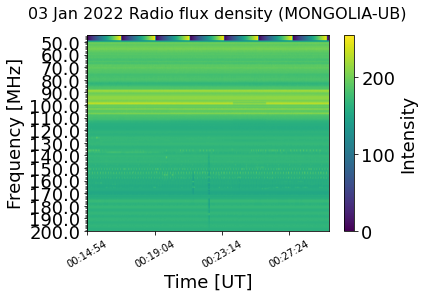

In [180]:
from astropy.timeseries import LombScargle
import download
import numpy as np
import data
import matplotlib.pyplot as plt
s="MONGOLIA-UB"

download.downloadFullDay(2022,1,2,station=s)
dp = data.createFromTime(2022,1,3,0,0,0, station=s)
dp.plot()


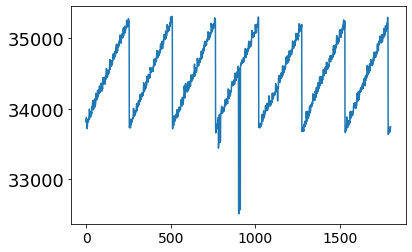

In [181]:
dp.createSummedCurve([45,200])
plt.plot(dp.summedCurve)
plt.show()

In [187]:
avg_ = []
for i in dp.spectrum_data.data:
    avg_.append(np.std(i))
avg_ = np.median(avg_)
for i in dp.spectrum_data.data:
    if np.std(i) > avg_* 10 :
        avg = np.mean(i)
        i[:] = avg

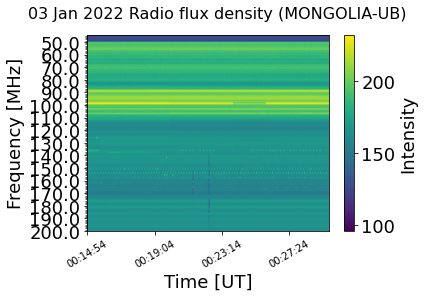

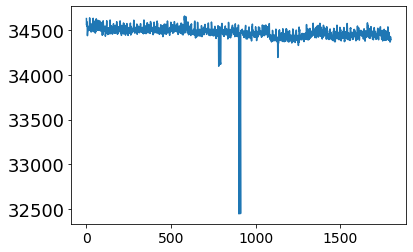

In [188]:
dp.plot()
dp.createSummedCurve([45,200])
plt.plot(dp.summedCurve)
plt.show()